### Import Libraries/Packages all in the same step

In [48]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# !conda install -c anaconda beautifulsoup4  
# !conda install -c anaconda lxml
# !conda install -c anaconda requests


Solving environment: done

# All requested packages already installed.



### Import the Wikipedia table into the Jupyter Environment

In [49]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

df_holder=pd.read_html(url, header=0)[0]


### 1) Remove the "Not assigned" Boroughs 
### 2) collapse the duplicate Postcodes in 1 line each
### 3) Rename the "Not assigned" Neighborhoods into the name of the Borough
### 4) Rename "Neighbourhoods" into Neighborhoods

In [50]:
#  Remove the "Not assigned" Boroughs  
df=df_holder[df_holder['Borough']!='Not assigned'].rename(columns={'Neighbourhood':'Neighborhood'})

# Rename the "Not assigned" Neighborhoods into the name of the Borough
condition=[df['Neighborhood']=='Not assigned']
outcome=[df['Borough']]
df['Neighborhood']=np.select(condition, outcome, default=df['Neighborhood'])

# collapse the duplicate Postcodes in 1 line each
df=df.groupby(['Postcode','Borough'])['Neighborhood'].apply(','.join).reset_index()
df

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [51]:
df.shape

(103, 3)

### Download the Geospatial Data and merge it with the Postcode Dataset

In [52]:
# Get the Geospatial Data
!wget -O Geospatial_Coordinates.csv http://cocl.us/Geospatial_data
coordinates=pd.read_csv("Geospatial_Coordinates.csv")


--2019-08-19 14:54:43--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.48.113.201
Connecting to cocl.us (cocl.us)|169.48.113.201|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2019-08-19 14:54:44--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|169.48.113.201|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2019-08-19 14:54:44--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197, 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2019-08-19 14:54:45--  https://ibm.box.com/public/static/9afz

In [53]:
# Merge with the original data set and keep only the Boroughs with the word "Toronto" in them
df=pd.merge(df, coordinates, how='left', left_on='Postcode', right_on='Postal Code')
df['index_']=df['Borough'].str.find('Toronto')
df=df[df['index_']!=-1]
df.shape

(38, 7)

### Import the Census Data to get the population per zip code

In [54]:
# The code was removed by Watson Studio for sharing.

,Geographic code,Geographic name,Province or territory,Population 2016,Total private dwellings 2016,Private dwellings occupied by usual residents 2016
0,A0A,A0A,Newfoundland and Labrador,46587,26155,19426
1,A0B,A0B,Newfoundland and Labrador,19792,13658,8792
2,A0C,A0C,Newfoundland and Labrador,12587,8010,5606
3,A0E,A0E,Newfoundland and Labrador,22294,12293,9603
4,A0G,A0G,Newfoundland and Labrador,35266,21750,15200
5,A0H,A0H,Newfoundland and Labrador,17804,9928,7651
6,A0J,A0J,Newfoundland and Labrador,7880,4813,3426
7,A0K,A0K,Newfoundland and Labrador,26058,15159,11090
8,A0L,A0L,Newfoundland and Labrador,7643,3769,3178
9,A0M,A0M,Newfoundland and Labrador,6200,3247,2769


### Add the population census data with a merge function

In [55]:
df = pd.merge(df, population, how="left", left_on='Postcode', right_on="Geographic code")
df

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude,index_,Geographic code,Geographic name,Province or territory,Population 2016,Total private dwellings 2016,Private dwellings occupied by usual residents 2016
0,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031,5,M4E,M4E,Ontario,25044,11284,10784
1,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188,5,M4K,M4K,Ontario,31583,15198,14556
2,M4L,East Toronto,"The Beaches West,India Bazaar",M4L,43.668999,-79.315572,5,M4L,M4L,Ontario,32640,14634,13901
3,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923,5,M4M,M4M,Ontario,24689,11393,10787
4,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790,8,M4N,M4N,Ontario,15330,6497,6190
5,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197,8,M4P,M4P,Ontario,20039,12207,11487
6,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678,8,M4R,M4R,Ontario,11394,5332,5036
7,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790,8,M4S,M4S,Ontario,26506,14011,13397
8,M4T,Central Toronto,"Moore Park,Summerhill East",M4T,43.689574,-79.383160,8,M4T,M4T,Ontario,10463,5499,5212
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",M4V,43.686412,-79.400049,8,M4V,M4V,Ontario,18241,10308,9666


#### Use geopy library to get the latitude and longitude values of Toronto.

In [56]:
# Get the coordinates of Toronto
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [57]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version
#### Rename the dataset to sth more intuitive

In [58]:
CLIENT_ID = 'RP2E0IE2FWJKQN4FWNFSEPUGVFGIJP5PDV1WW2XTR0ZUADF3' 
CLIENT_SECRET = 'MUVQJLKDUCTQRKHO4UOJJIKWBAM2DGC3SB5KQCRMJOY4NMAT' 
VERSION = '20190819' 

toronto_data=df.copy()

#### create a function to explore all the neighborhoods in Toronto

In [59]:
# Get the hundred closest venues to the neighborhood's location
LIMIT=100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Execute the function to get the venue data for all Toronto Neighborhoods

In [60]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                 
                                  )

toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,"The Danforth West,Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
6,"The Danforth West,Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
7,"The Danforth West,Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West,Riverdale",43.679557,-79.352188,La Diperie,43.677530,-79.352295,Ice Cream Shop
9,"The Danforth West,Riverdale",43.679557,-79.352188,Messini Authentic Gyros,43.677827,-79.350569,Greek Restaurant


### Bring in the population numbers

In [63]:
population_subset = df[['Neighborhood', 'Population 2016']]
toronto_venues = pd.merge(toronto_venues, population_subset, how='left', left_on='Neighborhood', right_on='Neighborhood')

### Get a sense of the venue categories (Define the competition)

In [18]:
check_venues = toronto_venues.groupby('Venue Category', as_index=False).count()
check_venues



,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Afghan Restaurant,1,1,1,1,1,1
1,Airport,1,1,1,1,1,1
2,Airport Food Court,1,1,1,1,1,1
3,Airport Gate,1,1,1,1,1,1
4,Airport Lounge,2,2,2,2,2,2
5,Airport Service,2,2,2,2,2,2
6,Airport Terminal,2,2,2,2,2,2
7,American Restaurant,23,23,23,23,23,23
8,Antique Shop,3,3,3,3,3,3
9,Aquarium,5,5,5,5,5,5


In [102]:
# Based on the above list split all ethnic restaurant venues into ethnic competitors and non-competitors

ethnic_competitors=[
'Doner Restaurant'
,'Ethiopian Restaurant'
,'Falafel Restaurant'
,'Greek Restaurant'
,'Italian Restaurant'
,'Jewish Restaurant'
,'Mediterranean Restaurant'
,'Middle Eastern Restaurant'
,'Portuguese Restaurant'
,'Tapas Restaurant'
]

ethnic_non_competitors=[
'Afghan Restaurant'
,'Asian Restaurant'
,'Brazilian Restaurant'
,'Burrito Place'
,'Cajun / Creole Restaurant'
,'Caribbean Restaurant'
,'Chinese Restaurant'
,'Colombian Restaurant'
,'Creperie'
,'Cuban Restaurant'
,'Deli / Bodega'
,'Eastern European Restaurant'
,'Filipino Restaurant'
,'French Restaurant'
,'German Restaurant'
,'Indian Restaurant'
,'Japanese Restaurant'
,'Korean Restaurant'
,'Latin American Restaurant'
,'Malay Restaurant'
,'Mexican Restaurant'
,'Modern European Restaurant'
,'Persian Restaurant'
,'Polish Restaurant'
,'Ramen Restaurant'
,'South American Restaurant'
,'Southern / Soul Food Restaurant'
,'Sushi Restaurant'
,'Taco Place'
,'Taiwanese Restaurant'
,'Thai Restaurant'
,'Vietnamese Restaurant'
]

# Flag the venues into ethnic and non-ethnic competitors
toronto_venues['ethnic competitors']=np.where(toronto_venues['Venue Category'].isin(ethnic_competitors),1,0)
toronto_venues['ethnic non competitors']=np.where(toronto_venues['Venue Category'].isin(ethnic_non_competitors),1,0)

# Create one line per neighborhood
toronto_venues_flat = toronto_venues.groupby('Neighborhood', as_index=False).agg({'Population 2016_x':'mean', 'ethnic competitors':'sum', 'ethnic non competitors':'sum'})

# standardize the competition by taking into account the population of each zip code
toronto_venues_flat['residents per ethnic competitor'] = np.where(toronto_venues_flat['ethnic competitors']==0,toronto_venues_flat['Population 2016_x'],toronto_venues_flat['Population 2016_x']/toronto_venues_flat['ethnic competitors'])
toronto_venues_flat['residents per ethnic non competitor'] = np.where(toronto_venues_flat['ethnic non competitors']==0,toronto_venues_flat['Population 2016_x'],toronto_venues_flat['Population 2016_x']/toronto_venues_flat['ethnic non competitors'])

toronto_venues_flat


,Neighborhood,Population 2016_x,ethnic competitors,ethnic non competitors,residents per ethnic competitor,residents per ethnic non competitor
0,"Adelaide,King,Richmond",2005,3,16,668.333333,125.312500
1,Berczy Park,9118,2,4,4559.000000,2279.500000
2,"Brockton,Exhibition Place,Parkdale Village",40957,1,2,40957.000000,20478.500000
3,Business Reply Mail Processing Centre 969 Eastern,10,0,1,10.000000,10.000000
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",49195,0,0,49195.000000,49195.000000
5,"Cabbagetown,St. James Town",20822,2,7,10411.000000,2974.571429
6,Central Bay Street,8423,8,11,1052.875000,765.727273
7,"Chinatown,Grange Park,Kensington Market",17748,2,22,8874.000000,806.727273
8,Christie,32086,1,0,32086.000000,32086.000000
9,Church and Wellesley,30472,4,21,7618.000000,1451.047619


### We need to standardize the variables because they have different units and will affect the clustering algorithm differently

In [92]:
# Create a copy of the data set
toronto_venues_flat_std = toronto_venues_flat.copy()

from sklearn.preprocessing import StandardScaler

std_vars=['Population 2016_x' ,'residents per ethnic competitor', 'residents per ethnic non competitor']

# define the variables that need to be standardized

toronto_venues_flat_std[std_vars]=StandardScaler().fit_transform(toronto_venues_flat_std[std_vars])
toronto_venues_flat_std=toronto_venues_flat_std.drop(['Neighborhood','ethnic competitors','ethnic non competitors'], 1)
toronto_venues_flat_std

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Population 2016_x,residents per ethnic competitor,residents per ethnic non competitor
0,-1.339711,-1.025651,-0.862861
1,-0.819509,-0.752263,-0.686738
2,1.509002,1.805340,0.801187
3,-1.485613,-1.071911,-0.872289
4,2.111480,2.384205,3.149009
5,0.036450,-0.341057,-0.629910
6,-0.870337,-0.998630,-0.810502
7,-0.188363,-0.449058,-0.807150
8,0.860231,1.181995,1.750200
9,0.742193,-0.537314,-0.754471


### Decide on the number of clusters using the "elbow" method

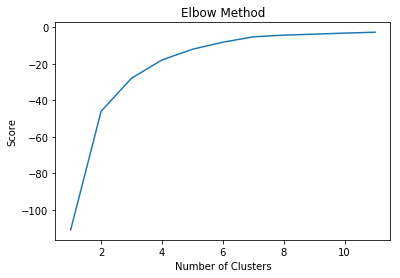

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


number_clusters = range(1, 12)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
score = [kmeans[i].fit(toronto_venues_flat_std).score(toronto_venues_flat_std) for i in range(len(kmeans))]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

 



Text(0.5, 0, 'n_components')

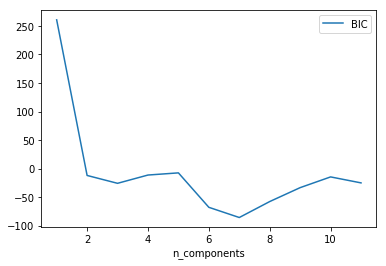

In [96]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 12)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(toronto_venues_flat_std)
           for n in n_components]

plt.plot(n_components, [m.bic(toronto_venues_flat_std) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

### K-Means Clustering for 3 and 4 clusters

In [110]:
# 3 clusters
kmeans=KMeans(n_clusters=3).fit_predict(toronto_venues_flat_std)

toronto_venues_flat['cluster']=kmeans
toronto_venues_flat_simple=toronto_venues_flat.drop(['ethnic competitors','ethnic non competitors'], 1)
toronto_venues_k_means_3_clusters = toronto_venues_flat_simple.groupby('cluster').agg({'Neighborhood':'count','Population 2016_x':'mean', 'residents per ethnic competitor':'mean', 'residents per ethnic non competitor':'mean'})
toronto_venues_k_means_3_clusters

,Neighborhood,Population 2016_x,residents per ethnic competitor,residents per ethnic non competitor
cluster,,,,
0,17,21742.941176,12926.740196,8811.194408
1,9,36942.333333,36942.333333,26474.546296
2,11,4532.909091,1141.587121,642.238258


In [111]:
# 4 clusters
kmeans=KMeans(n_clusters=4).fit_predict(toronto_venues_flat_std)

toronto_venues_flat['cluster']=kmeans
toronto_venues_flat_simple=toronto_venues_flat.drop(['ethnic competitors','ethnic non competitors'], 1)
toronto_venues_k_means_4_clusters = toronto_venues_flat_simple.groupby('cluster').agg({'Neighborhood':'count','Population 2016_x':'mean', 'residents per ethnic competitor':'mean', 'residents per ethnic non competitor':'mean'})
toronto_venues_k_means_4_clusters

,Neighborhood,Population 2016_x,residents per ethnic competitor,residents per ethnic non competitor
cluster,,,,
0,17,21742.941176,12926.740196,8811.194408
1,2,47072.500000,47072.500000,47072.500000
2,11,4532.909091,1141.587121,642.238258
3,7,34048.000000,34048.000000,20589.416667


### Gaussian mixtures Clustering for 3, 6 and 7 clusters

In [112]:
# 3 clusters
gmm=GaussianMixture(n_components=3).fit(toronto_venues_flat_std).predict(toronto_venues_flat_std)
toronto_venues_flat['cluster']=gmm
toronto_venues_flat_simple=toronto_venues_flat.drop(['ethnic competitors','ethnic non competitors'], 1)
toronto_venues_gaussian_3_clusters = toronto_venues_flat_simple.groupby('cluster').agg({'Neighborhood':'count','Population 2016_x':'mean', 'residents per ethnic competitor':'mean', 'residents per ethnic non competitor':'mean'})
toronto_venues_gaussian_3_clusters

 

,Neighborhood,Population 2016_x,residents per ethnic competitor,residents per ethnic non competitor
cluster,,,,
0,8,27350.375000,8615.947917,4500.863116
1,18,26850.444444,26850.444444,19558.573148
2,11,4532.909091,1141.587121,642.238258


In [113]:
# 6 clusters
gmm=GaussianMixture(n_components=6).fit(toronto_venues_flat_std).predict(toronto_venues_flat_std)
toronto_venues_flat['cluster']=gmm
toronto_venues_flat_simple=toronto_venues_flat.drop(['ethnic competitors','ethnic non competitors'], 1)
toronto_venues_gaussian_6_clusters = toronto_venues_flat_simple.groupby('cluster').agg({'Neighborhood':'count','Population 2016_x':'mean', 'residents per ethnic competitor':'mean', 'residents per ethnic non competitor':'mean'})
toronto_venues_gaussian_6_clusters

 

,Neighborhood,Population 2016_x,residents per ethnic competitor,residents per ethnic non competitor
cluster,,,,
0,4,16216.000000,16216.000000,6955.100000
1,5,7056.400000,1780.575000,925.582500
2,13,13048.000000,13046.717949,13046.272436
3,4,38677.500000,38677.500000,15124.979167
4,2,47072.500000,47072.500000,47072.500000
5,9,25927.555556,8062.648148,4270.119066


In [114]:
# 7 clusters
gmm=GaussianMixture(n_components=7).fit(toronto_venues_flat_std).predict(toronto_venues_flat_std)
toronto_venues_flat['cluster']=gmm
toronto_venues_flat_simple=toronto_venues_flat.drop(['ethnic competitors','ethnic non competitors'], 1)
toronto_venues_gaussian_7_clusters = toronto_venues_flat_simple.groupby('cluster').agg({'Neighborhood':'count','Population 2016_x':'mean', 'residents per ethnic competitor':'mean', 'residents per ethnic non competitor':'mean'})
toronto_venues_gaussian_7_clusters

 

,Neighborhood,Population 2016_x,residents per ethnic competitor,residents per ethnic non competitor
cluster,,,,
0,5,15003.600000,5922.216667,1929.447619
1,8,21198.625000,21198.625000,21198.625000
2,4,16216.000000,16216.000000,6955.100000
3,6,30038.833333,8273.763889,5370.934371
4,4,38677.500000,38677.500000,15124.979167
5,8,1676.750000,278.921875,149.835180
6,2,47072.500000,47072.500000,47072.500000
